In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [34]:
def activation(traces, time, decay):
    """Computes the activation of a memory given its history of retrievals"""
    ftraces = [x for x in traces if x < time]
    decay = max(0, decay)  # Allows no positive decay rates in equation 
    decay - min(decay, 5)
    times = time - np.array(ftraces)
    odds = times ** -decay
    if len(odds) > 0:
        return np.log(np.sum(odds))
    else:
        return 0

activation([5], 3, 0.5)

0

In [55]:
def boltzmann(options, values, temperature):
    """Returns a Boltzmann distribution of the probabilities of each option"""
    temperature = max(temperature, 0.01) 
    vals = np.array(values)/temperature
    bvals = np.exp(vals - np.max(vals)) / np.exp(vals - np.max(vals)).sum()
    return dict(zip(options, bvals))

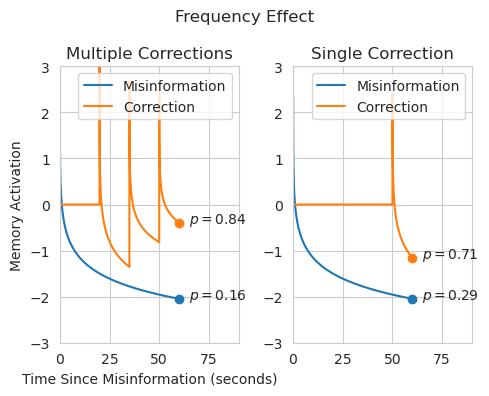

In [107]:
time = np.linspace(0, 60, 6000)
misinformation_traces = [0.001]
correction_traces = [20.001, 35.001, 50.0001]

fig, axs = plt.subplots(1, 2, figsize=(5,4))

y1 = []
y2 = []
y3 = []
for t in time:
    act = activation(misinformation_traces, t, 0.5)
    y1 += [act]
    act = activation(correction_traces, t, 0.5)
    y2 += [act]
    act = activation(correction_traces[-1:], t, 0.5)
    y3 += [act]

probs = boltzmann(labels, [y1[-1], y2[-1]], 1)

labels = ["Misinformation", "Correction"]
xlim=[0,90]
ylim=[-3, 3]

axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)

axs[0].plot(time, y1)
axs[0].plot(time, y2)
axs[0].set_xlabel("Time Since Misinformation (seconds)")
axs[0].set_ylabel("Memory Activation")
axs[0].legend(labels)
axs[0].set_title("Multiple Corrections")

axs[0].set_prop_cycle(None)
axs[0].plot(time[-1], y1[-1], 'o')
axs[0].plot(time[-1], y2[-1], 'o')

axs[0].set_prop_cycle(None)
axs[0].text(time[-1] + 5, y1[-1], "$p = %.2f$" % (np.round(probs["Misinformation"], 2),))
axs[0].text(time[-1] + 5, y2[-1], "$p = %.2f$" % (np.round(probs["Correction"], 2),))

probs = boltzmann(labels, [y1[-1], y3[-1]], 1)

axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)

axs[1].set_xlim(0, 90)
axs[1].plot(time, y1)
axs[1].plot(time, y3)

axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].legend(labels)
axs[1].set_prop_cycle(None)
axs[1].plot(time[-1], y1[-1], 'o')
axs[1].plot(time[-1], y3[-1], 'o')
axs[1].set_title("Single Correction")

axs[1].set_prop_cycle(None)
axs[1].text(time[-1] + 5, y1[-1], "$p = %.2f$" % (np.round(probs["Misinformation"], 2),))
axs[1].text(time[-1] + 5, y3[-1], "$p = %.2f$" % (np.round(probs["Correction"], 2),))


fig.suptitle("Frequency Effect")
fig.tight_layout()
plt.savefig("frequency.png")
plt.show()

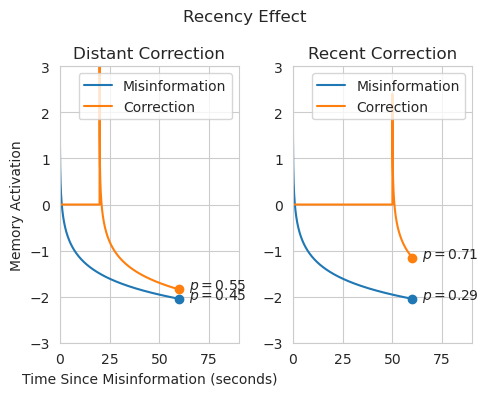

In [108]:
time = np.linspace(0, 60, 6000)
misinformation_traces = [0.001]
correction_traces = [20.001, 50.0001]

fig, axs = plt.subplots(1, 2, figsize=(5,4))

y1 = []
y2 = []
y3 = []
for t in time:
    act = activation(misinformation_traces, t, 0.5)
    y1 += [act]
    act = activation(correction_traces[0:1], t, 0.5)
    y2 += [act]
    act = activation(correction_traces[-1:], t, 0.5)
    y3 += [act]

probs = boltzmann(labels, [y1[-1], y2[-1]], 1)

labels = ["Misinformation", "Correction"]
xlim=[0,90]
ylim=[-3, 3]

axs[0].set_xlim(xlim)
axs[0].set_ylim(ylim)

axs[0].plot(time, y1)
axs[0].plot(time, y2)
axs[0].set_xlabel("Time Since Misinformation (seconds)")
axs[0].set_ylabel("Memory Activation")
axs[0].legend(labels)
axs[0].set_title("Distant Correction")

axs[0].set_prop_cycle(None)
axs[0].plot(time[-1], y1[-1], 'o')
axs[0].plot(time[-1], y2[-1], 'o')

axs[0].set_prop_cycle(None)
axs[0].text(time[-1] + 5, y1[-1], "$p = %.2f$" % (np.round(probs["Misinformation"], 2),))
axs[0].text(time[-1] + 5, y2[-1], "$p = %.2f$" % (np.round(probs["Correction"], 2),))

#col=next(axs[1]._get_lines.prop_cycler)['color']

probs = boltzmann(labels, [y1[-1], y3[-1]], 1)

axs[1].set_xlim(xlim)
axs[1].set_ylim(ylim)

axs[1].set_xlim(0, 90)
axs[1].plot(time, y1)
axs[1].plot(time, y3)

axs[1].set_xlabel("")
axs[1].set_ylabel("")
axs[1].legend(labels)
axs[1].set_prop_cycle(None)
axs[1].plot(time[-1], y1[-1], 'o')
axs[1].plot(time[-1], y3[-1], 'o')
axs[1].set_title("Recent Correction")

axs[1].set_prop_cycle(None)
axs[1].text(time[-1] + 5, y1[-1], "$p = %.2f$" % (np.round(probs["Misinformation"], 2),))
axs[1].text(time[-1] + 5, y3[-1], "$p = %.2f$" % (np.round(probs["Correction"], 2),))

fig.suptitle("Recency Effect")
fig.tight_layout()
plt.savefig("recency.png")
plt.show()